In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # required even though not ref'd!
from matplotlib import rcParams
import matplotlib as mpl
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import glob
import os
from PIL import Image as PIL_Image

%config InlineBackend.figure_format = 'retina'

def normalize(X): # well, I'm creating standard variables here (u-x)/sigma
    for colname in X.columns:
        u = np.mean(X[colname])
        s = np.std(X[colname])
        X[colname] = (X[colname] - u) / s
        
def np_normalize(x):
    return (x-np.mean(x)) / np.std(x)

# 1D minimization

Text(1.4, 3.0, '$loss(\\beta_1) = (\\beta_1-2)^2$')

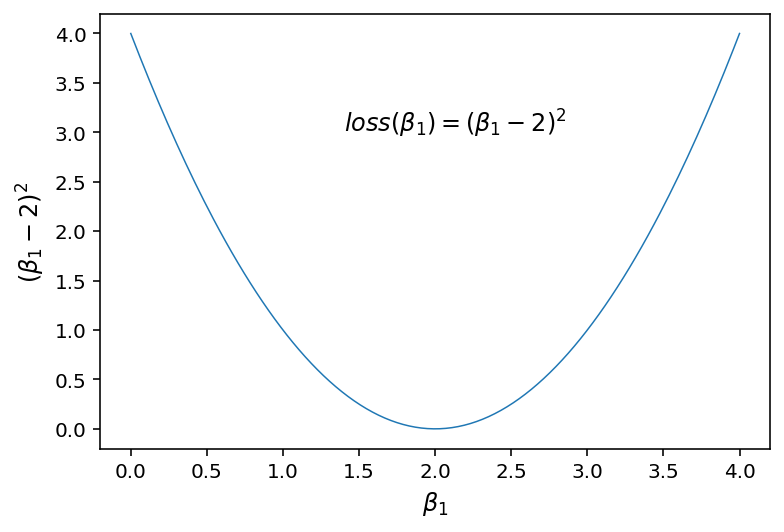

In [4]:
plt.figure(figsize=(6,4))
b1 = np.linspace(0,4,200)    
mse = (b1-2)**2
plt.plot(b1, mse, lw=.75, label="$(\\beta_1-2)^2$")
plt.xlabel("$\\beta_1$", fontsize=12)
plt.ylabel("$(\\beta_1-2)^2$", fontsize=12)
plt.text(1.4,3.0,"$loss(\\beta_1) = (\\beta_1-2)^2$", fontsize=12)

b^(0)=0.25, f(beta_1)=3.06, gradient -3.50
b^(1)=0.95, f(beta_1)=1.10, gradient -2.10
b^(2)=1.37, f(beta_1)=0.40, gradient -1.26
b^(3)=1.62, f(beta_1)=0.14, gradient -0.76
b^(4)=1.77, f(beta_1)=0.05, gradient -0.45
b^(5)=1.86, f(beta_1)=0.02, gradient -0.27
b^(6)=1.92, f(beta_1)=0.01, gradient -0.16


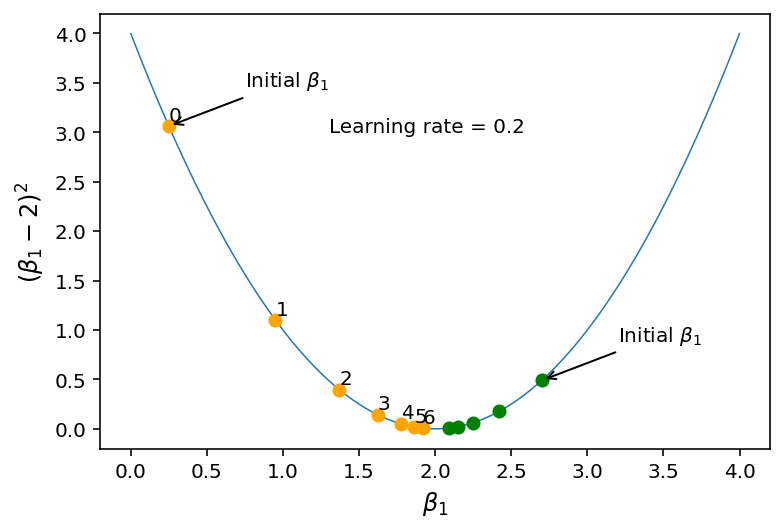

In [5]:
plt.figure(figsize=(6,4))
b1 = np.linspace(0,4,200)    
mse = (b1-2)**2
plt.plot(b1, mse, lw=.75, label="$(\\beta_1-2)^2$")
plt.xlabel("$\\beta_1$", fontsize=12)
plt.ylabel("$(\\beta_1-2)^2$", fontsize=12)

def f(b) : return (b-2)**2
def gradient(b): return 2*(b-2)

rate = .2  # learning rate
b = 0.25   # initial guess at beta1
plt.annotate("Initial $\\beta_1$", xy=[b,f(b)], xytext=[b+.5,f(b)+.4], arrowprops=dict(arrowstyle="->"))
plt.text(1.3,3.0,f"Learning rate = {rate:.1f}", fontsize=10)
for i in range(7):
    plt.plot([b],[f(b)], marker='o', markersize=6, color='orange')
    plt.text(b, f(b)+.05, str(i))
    print(f"b^({i})={b:.2f}, f(beta_1)={f(b):.2f}, gradient {gradient(b):.2f}")
    b = b - rate * gradient(b)
    
b = 2.7   # initial guess at beta1
plt.annotate("Initial $\\beta_1$", xy=[b,f(b)], xytext=[b+.5,f(b)+.4], arrowprops=dict(arrowstyle="->"))
for i in range(5):
    plt.plot([b],[f(b)], marker='o', markersize=6, color='green')
    b = b - rate * gradient(b)

## Learning rate too high

b^(0)=0.25, f(beta_1)=3.06, gradient -3.50
b^(1)=3.65, f(beta_1)=2.71, gradient 3.29
b^(2)=0.45, f(beta_1)=2.39, gradient -3.09
b^(3)=3.45, f(beta_1)=2.11, gradient 2.91
b^(4)=0.63, f(beta_1)=1.87, gradient -2.73
b^(5)=3.28, f(beta_1)=1.65, gradient 2.57
b^(6)=0.79, f(beta_1)=1.46, gradient -2.41


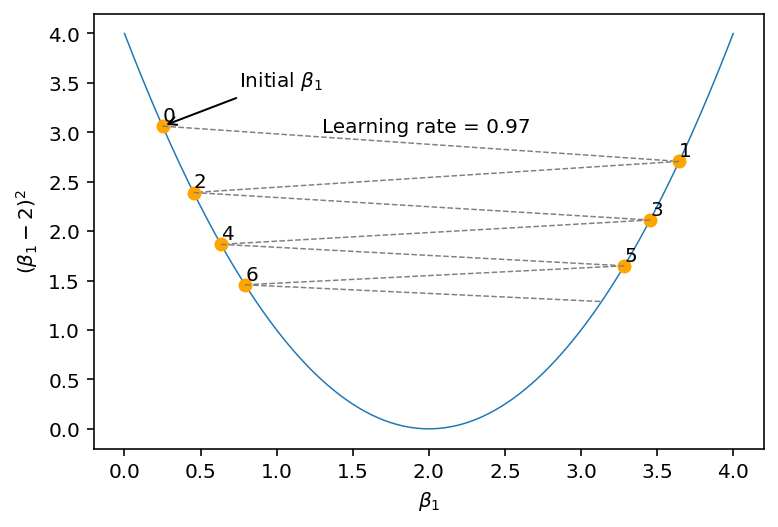

In [6]:
plt.figure(figsize=(6,4))
plt.plot(b1, mse, lw=.75, label="$(\\beta_1-2)^2$")
plt.xlabel("$\\beta_1$")
plt.ylabel("$(\\beta_1-2)^2$")

rate = .97  # learning rate
b = 0.25   # initial guess at beta1
plt.annotate("Initial $\\beta_1$", xy=[b,f(b)], xytext=[b+.5,f(b)+.4], arrowprops=dict(arrowstyle="->"))
plt.text(1.3,3.0,f"Learning rate = {rate:.2f}", fontsize=10)
for i in range(7):
    plt.plot([b],[f(b)], marker='o', markersize=6, color='orange')
    plt.text(b, f(b)+.05, str(i))
    print(f"b^({i})={b:.2f}, f(beta_1)={f(b):.2f}, gradient {gradient(b):.2f}")
    prev_b = b
    b = b - rate * gradient(b)
    plt.plot([prev_b,b],[f(prev_b),f(b)], '--', lw=.75, color='grey')

## Learning rate 1.0 makes it oscillate

b^(0)=0.25, f(beta_1)=3.06, gradient -3.50
b^(1)=3.75, f(beta_1)=3.06, gradient 3.50
b^(2)=0.25, f(beta_1)=3.06, gradient -3.50
b^(3)=3.75, f(beta_1)=3.06, gradient 3.50
b^(4)=0.25, f(beta_1)=3.06, gradient -3.50
b^(5)=3.75, f(beta_1)=3.06, gradient 3.50
b^(6)=0.25, f(beta_1)=3.06, gradient -3.50


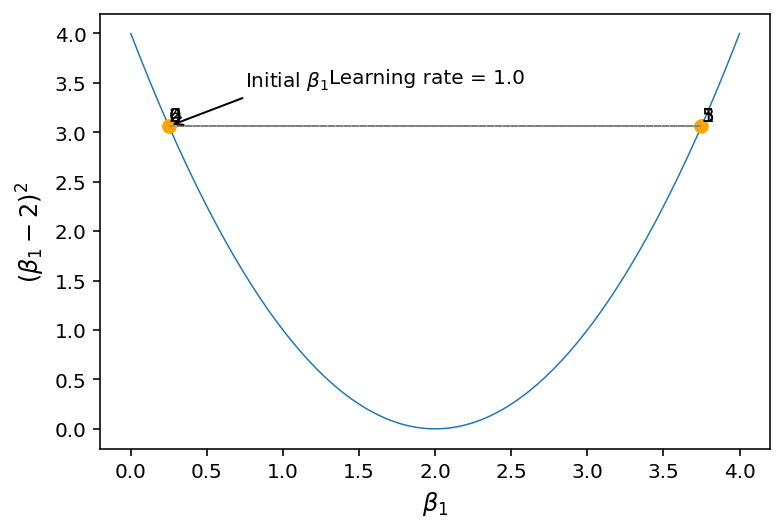

In [7]:
plt.figure(figsize=(6,4))
plt.plot(b1, mse, lw=.75, label="$(\\beta_1-2)^2$")
plt.xlabel("$\\beta_1$", fontsize=12)
plt.ylabel("$(\\beta_1-2)^2$", fontsize=12)

rate = 1  # learning rate
b = 0.25   # initial guess at beta1
plt.annotate("Initial $\\beta_1$", xy=[b,f(b)], xytext=[b+.5,f(b)+.4], arrowprops=dict(arrowstyle="->"))
plt.text(1.3,3.5,f"Learning rate = {rate:.1f}", fontsize=10)
for i in range(7):
    plt.plot([b],[f(b)], marker='o', markersize=6, color='orange')
    plt.text(b, f(b)+.05, str(i))
    print(f"b^({i})={b:.2f}, f(beta_1)={f(b):.2f}, gradient {gradient(b):.2f}")
    prev_b = b
    b = b - rate * gradient(b)
    plt.plot([prev_b,b],[f(prev_b),f(b)], '--', lw=.75, color='grey')

## Simple full 1D implementation

In [8]:
def todf(trace):
    df = pd.DataFrame()
    df['beta_1'] = trace
    df['loss'] = f(np.array(trace))
    return df

In [9]:
def f(b) : return (b-2)**2
def gradient(b): return 2*(b-2)

def minimize(f,rate=.2,niter=7):
    b = np.random.random()   # initial guess at beta1
    trace = [b]              # track complete trace of beta1
    for i in range(niter):
#        print(f"{i:02d}: beta_1={b:.2f}, f(beta_1)={f(b):.2f}, gradient {gradient(b):.2f}")
        b = b - rate * gradient(b)
        trace.append(b)
    return trace

trace = minimize(f,rate=1)
print(f"Best beta_1 = {trace[-1]:.2f}")
todf(trace)

Best beta_1 = 3.88


,beta_1,loss
0,0.121095,3.530282
1,3.878905,3.530282
2,0.121095,3.530282
3,3.878905,3.530282
4,0.121095,3.530282
5,3.878905,3.530282
6,0.121095,3.530282
7,3.878905,3.530282


# 2D minimization

In [10]:
def loss(B,X,y):
    "Line coefficients: B = [y-intercept, slope]"
    return np.mean((y - np.dot(X,np.array(B)))**2)

def get_surface(X, y, loss, b0_range, b1_range):
    n = len(X)
    B0 = np.ones(shape=(n, 1))
    X = np.hstack([np.ones(shape=(n, 1)), X]) # add ones column
    (b0_mesh, b1_mesh) = np.meshgrid(b0_range, b1_range, indexing='ij')
    L = np.zeros(b0_mesh.shape)

    for i in range(len(b0_range)):
        for j in range(len(b1_range)):
            L[i][j] = loss([b0_range[i],b1_range[j]], X=X, y=y)
    return L

def plot3d(L, b0_range, b1_range, ax, elev=50, azim=145):
    rcParams["font.size"] = 10
    ax.view_init(elev, azim)
    b0_range_mesh, b1_range_mesh = np.meshgrid(b0_range, b1_range, indexing='ij')
    surface = ax.plot_surface(b0_range_mesh, b1_range_mesh, L, alpha=0.7, cmap='coolwarm')
    
#    plt.title("""$loss(\\beta) = \sum_{i=1}^{N}(y^{{(i)}} - (\\beta_0 + \\beta_1 x^{{(i)}}))^2$""", fontsize=12)
    ax.set_xlabel('$\\beta_0$', fontsize=14)
    ax.set_ylabel('$\\beta_1$', fontsize=14)
    ax.zaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))

In [11]:
df = pd.read_csv('cheese_deaths.csv')
df

,years,cheese,deaths
0,2000,29.8,327
1,2001,30.1,456
2,2002,30.5,509
3,2003,30.6,497
4,2004,31.3,596
5,2005,31.7,573
6,2006,32.6,661
7,2007,32.7,809
8,2008,32.8,717
9,2009,33.1,741


In [12]:
X, y = df.cheese, df.deaths

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)


lm = LinearRegression()
lm.fit(X, y)
true_b0 = lm.intercept_[0]
true_b1 = lm.coef_[0][0]
print(f"True b0 = {true_b0:.2f}, b1 = {true_b1:.1f}")

True b0 = -2977.35, b1 = 113.1


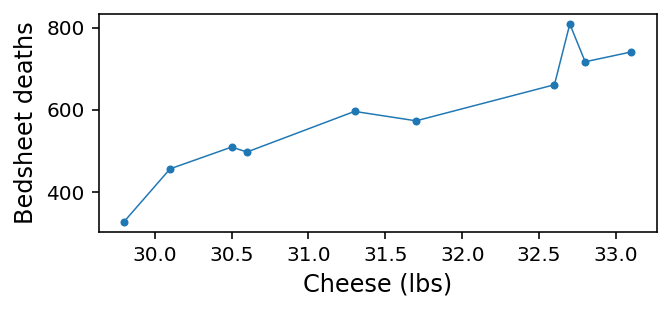

In [13]:
fig, ax1 = plt.subplots(figsize=(5,2.0))
p1, = ax1.plot(df.cheese, df.deaths, marker='o', markersize=3, lw=.75)
ax1.set_xlabel("Cheese (lbs)", fontsize=12)
ax1.set_ylabel("Bedsheet deaths", fontsize=12)
plt.show()

In [14]:
b0_range = np.arange(-3030, -2900, .1)  # y intercept
b1_range = np.arange(105, 120, .05)     # slope
L = get_surface(X, y, loss, b0_range=b0_range, b1_range=b1_range)


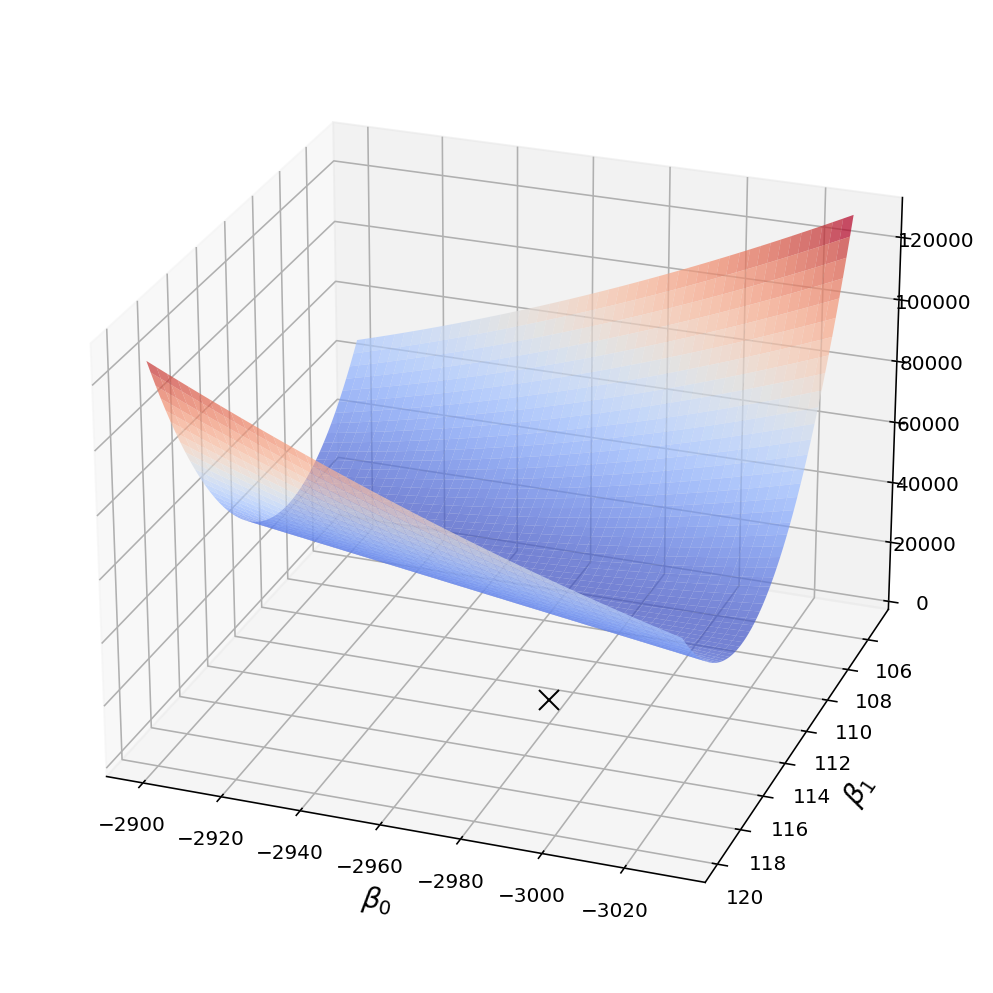

In [15]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
plot3d(L, b0_range=b0_range, b1_range=b1_range, ax=ax, elev=25, azim=110)
ax.plot([true_b0], [true_b1], marker='x', markersize=10, c='black')
plt.tight_layout()
plt.savefig("/Users/parrt/Desktop/2d-loss.svg",bbox_inches='tight')

### Normalized vars looks spherical

True b0 = 588.60, b1 = 132.1


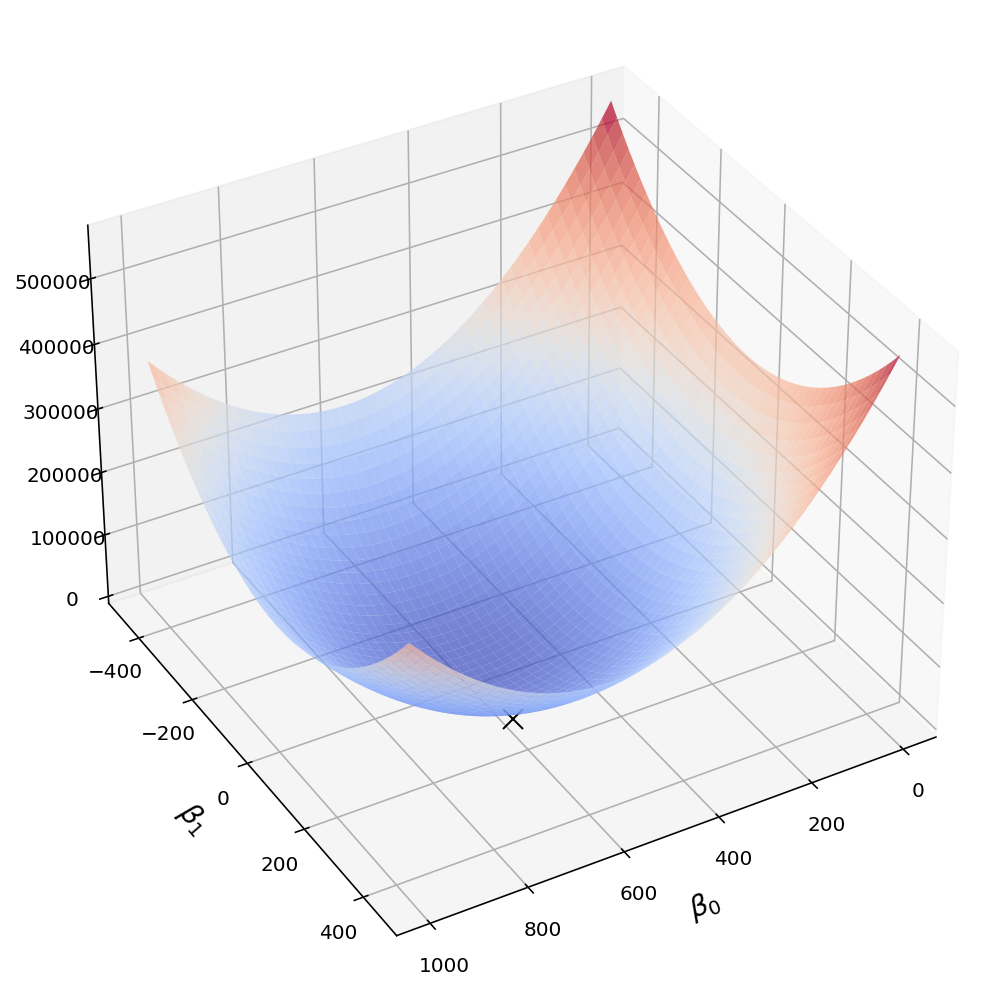

In [16]:
df = pd.read_csv('cheese_deaths.csv')
X, y = df.cheese, df.deaths
X = np_normalize(X)
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

lm = LinearRegression()
lm.fit(X, y)
true_b0 = lm.intercept_[0]
true_b1 = lm.coef_[0][0]
print(f"True b0 = {true_b0:.2f}, b1 = {true_b1:.1f}")

b0_range = np.arange(0, 1000, 5)  # y intercept
b1_range = np.arange(-450, 450, 5)  # slope
L = get_surface(X, y, loss, b0_range=b0_range, b1_range=b1_range)

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
plot3d(L, b0_range=b0_range, b1_range=b1_range, ax=ax, elev=35, azim=60)
ax.plot([true_b0], [true_b1], marker='x', markersize=10, c='black')
plt.tight_layout()
plt.savefig("/Users/parrt/Desktop/2d-loss-normalized.svg",bbox_inches='tight')

# Animation 1D quadratic example

From [here](https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter)

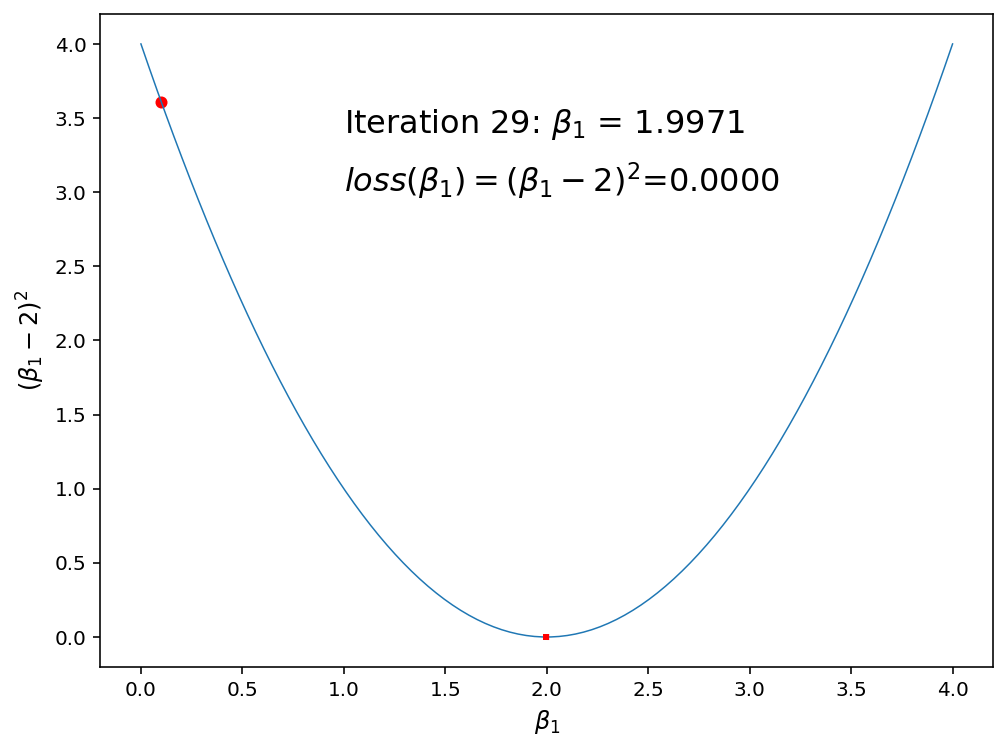

In [17]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

def f(b) : return (b-2)**2
def gradient(b): return 2*(b-2)

b1 = np.linspace(0,4,100)    
mse = (b1-2)**2

# init
rate = .1
initial_b = 0.1
b_history = [initial_b]

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(b1, mse, lw=.75, label="$(\\beta_1-2)^2$")
ax.set_xlabel("$\\beta_1$", fontsize=12)
ax.set_ylabel("$(\\beta_1-2)^2$", fontsize=12)
loss_label = ax.text(1.0,3.0,f"$loss(\\beta_1) = (\\beta_1-2)^2$={f(initial_b):.4f}", fontsize=16)
b_label = ax.text(1.0,3.4,f"Iteration 0: $\\beta_1$ = {initial_b:.4f}", fontsize=16)
particle, = ax.plot([],[],c='r',lw=3)
ax.scatter(initial_b,f(initial_b),c='r',s=25)

def update(b):
    b = b - rate * gradient(b)
    return b
    
def animate(i):
    if i==0: return
#    print(i, b_history[i-1:i+1])
    b_history.append( update(b_history[i-1]) )
    particle.set_data(b_history[i-1:i+1], f(np.array(b_history[i-1:i+1])))
    b_label.set_text(f"Iteration {i}: $\\beta_1$ = {b_history[i]:.4f}")
    loss_label.set_text(f"$loss(\\beta_1) = (\\beta_1-2)^2$={f(b_history[i]):.4f}")


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=30)
HTML(ani.to_jshtml())